In [28]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns


In [29]:
# Defining the ETF and time range:
ticker = 'SPY'
start_date = '2020-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

In [30]:
# Downloading the data:
df = yf.download(ticker, start = start_date, end = end_date)


# Calculating 50 day SMA:
df['SMA_50'] = df['Close'].rolling(window = 50).mean()

# Calculating 20 day SMA:
df['SMA_20'] = df['Close'].rolling(window = 20).mean()

[*********************100%***********************]  1 of 1 completed


In [5]:
df

Price,Close,High,Low,Open,Volume,SMA_50,SMA_20
Ticker,SPY,SPY,SPY,SPY,SPY,,
Date,,,,,,,
2020-01-02,300.291565,300.310070,298.128604,299.062200,59151200,NaN,NaN
2020-01-03,298.017731,299.154684,296.806842,296.862301,77709700,NaN,NaN
2020-01-06,299.154663,299.237851,296.122788,296.242957,55653900,NaN,NaN
2020-01-07,298.313477,299.062193,297.860529,298.581516,40496400,NaN,NaN
2020-01-08,299.903351,301.132716,298.258020,298.507583,68296000,NaN,NaN
...,...,...,...,...,...,...,...
2025-06-02,592.710022,592.789978,585.059998,587.760010,61630500,559.321201,581.936505
2025-06-03,596.090027,597.080017,591.849976,592.340027,63606200,559.963402,583.565506


## GENERATING BUY/SELL SIGNALS

In [31]:
df['Signal'] = 0   # Default: no signal

# Buy signal (1) when 20 day SMA > 50 day SMA, else sell signal (-1):
df.loc[df.index[49:], 'Signal'] = np.where(df['SMA_20'].iloc[49:] > df['SMA_50'].iloc[49:], 1, -1) 

In [7]:
df

Price,Close,High,Low,Open,Volume,SMA_50,SMA_20,Signal
Ticker,SPY,SPY,SPY,SPY,SPY,,,
Date,,,,,,,,
2020-01-02,300.291565,300.310070,298.128604,299.062200,59151200,NaN,NaN,0
2020-01-03,298.017639,299.154592,296.806751,296.862210,77709700,NaN,NaN,0
2020-01-06,299.154663,299.237851,296.122788,296.242957,55653900,NaN,NaN,0
2020-01-07,298.313507,299.062223,297.860559,298.581546,40496400,NaN,NaN,0
2020-01-08,299.903381,301.132746,298.258050,298.507613,68296000,NaN,NaN,0
...,...,...,...,...,...,...,...,...
2025-06-02,592.710022,592.789978,585.059998,587.760010,61630500,559.321201,581.936505,1
2025-06-03,596.090027,597.080017,591.849976,592.340027,63606200,559.963402,583.565506,1


## DETECTING CROSSOVERS:

In [32]:
df['Crossover'] = df['Signal'].diff()

In [33]:
df['Trade Signal'] = np.nan

In [34]:
df.loc[df['Crossover'] == 2, 'Trade Signal'] = 'Buy'  # Golden Cross
df.loc[df['Crossover'] == -2, 'Trade Signal'] = 'Sell'  # Death Cross

C:\Users\OMEN\AppData\Local\Temp\ipykernel_24804\3475245482.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Buy' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Crossover'] == 2, 'Trade Signal'] = 'Buy'  # Golden Cross


In [35]:
buy_signals = df[df['Crossover'] == 2 ]
sell_signals = df[df['Crossover'] == -2]

In [36]:
# Plotting the data:
plt.figure(figsize = (14,7))


<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

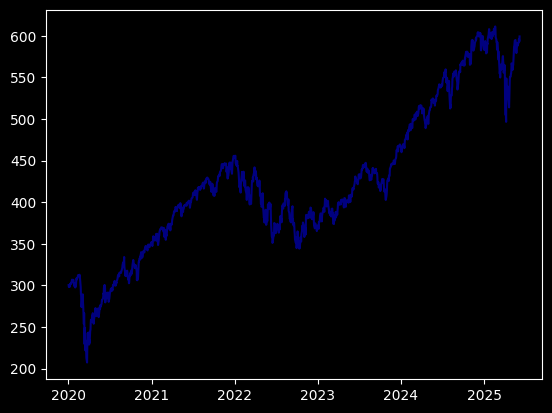

In [37]:
# Plot closing price
plt.plot(df['Close'], label='Close Price', color='blue', alpha=0.5)


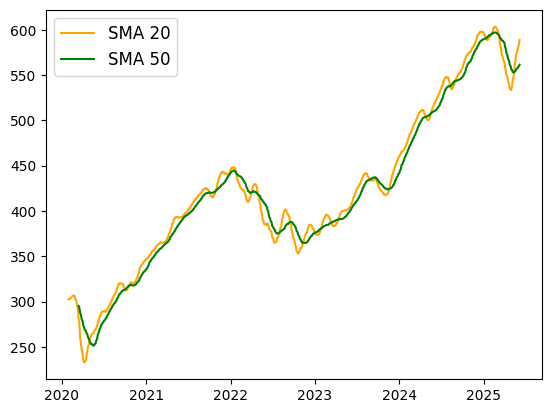

In [13]:
# Plot SMA lines
plt.plot(df['SMA_20'], label='SMA 20', color='orange', linewidth=1.5)
plt.plot(df['SMA_50'], label='SMA 50', color='green', linewidth=1.5)

plt.legend(loc = 'upper left', fontsize = 12)


Text(0.5, 0.01, 'Backtest of a Moving Average Crossover Strategy on SPY (2020–2025)')

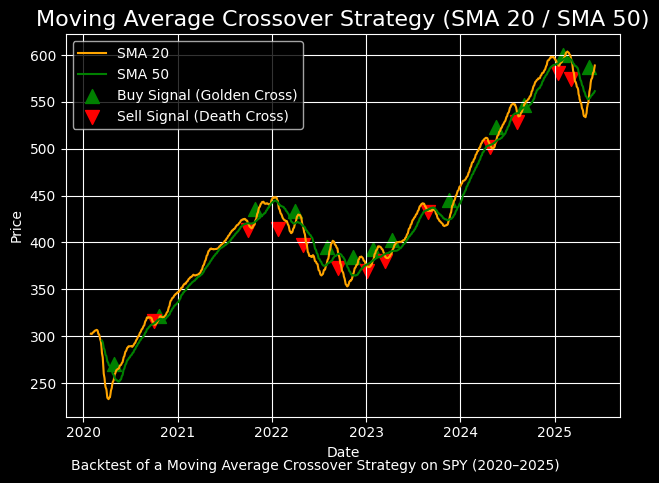

In [38]:


plt.title("Moving Average Crossover Strategy", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()

plt.plot(df['SMA_20'], label='SMA 20', color='orange', linewidth=1.5)
plt.plot(df['SMA_50'], label='SMA 50', color='green', linewidth=1.5)

plt.legend(loc = 'upper left', fontsize = 12)

# Plotting BUY signals
plt.scatter(buy_signals.index, buy_signals['Close'], label='Buy Signal (Golden Cross)', 
            marker='^', color='green', s=100)

# Plotting SELL signals
plt.scatter(sell_signals.index, sell_signals['Close'], label='Sell Signal (Death Cross)', 
            marker='v', color='red', s=100)

# Chart decorations
plt.title('Moving Average Crossover Strategy (SMA 20 / SMA 50)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.style.use('dark_background')
plt.figtext(0.5, 0.01, "Backtest of a Moving Average Crossover Strategy on SPY (2020–2025)", ha="center", fontsize=10)

